In [1]:
import tensorflow as tf
import os
import glob
import shutil
import re
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sns
from tqdm.notebook import tqdm
import pydicom  as dicom
import cv2
from PIL import Image


In [2]:
input_path = "../input/rsna-miccai-brain-tumor-radiogenomic-classification/"
train_labels_file = "train_labels.csv"

train_labels = pd.read_csv(input_path + train_labels_file)
train_labels

 # MGMT_Class = 0 refers to people who do not have the MGMT promoter methylation. 
 # MGMT_Class = 1 appears to be someone who has the MGMT promoter methylation.

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1
...,...,...
580,1005,1
581,1007,1
582,1008,1
583,1009,0


In [3]:
test_labels_file = "sample_submission.csv"

test_labels = pd.read_csv(input_path + test_labels_file)
test_labels

,BraTS21ID,MGMT_value
0,1,0.5
1,13,0.5
2,15,0.5
3,27,0.5
4,37,0.5
...,...,...
82,826,0.5
83,829,0.5
84,833,0.5
85,997,0.5


In [4]:
def plot_examples(row, cat):

    folder = str(train_labels.loc[row, 'BraTS21ID']).zfill(5)
    path_file = ''.join([input_path, 'train/', folder, '/', cat, '/'])
    images = os.listdir(path_file)
    
    fig, axs = plt.subplots(1, 5, figsize=(30, 10))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    
    for num in range(5):
        data_file = dicom.dcmread(path_file+images[num])
        img = data_file.pixel_array
        axs[num].imshow(img, cmap='gray')
        axs[num].set_title(cat+' '+images[num])
        axs[num].set_xticklabels([])
        axs[num].set_yticklabels([])
        axs[num].grid(False)
    
    plt.suptitle("MRI "+cat+" Scan for patient "+folder,
                 fontsize=18, color="#0b0a2d",
                 x=.5, y=.8)

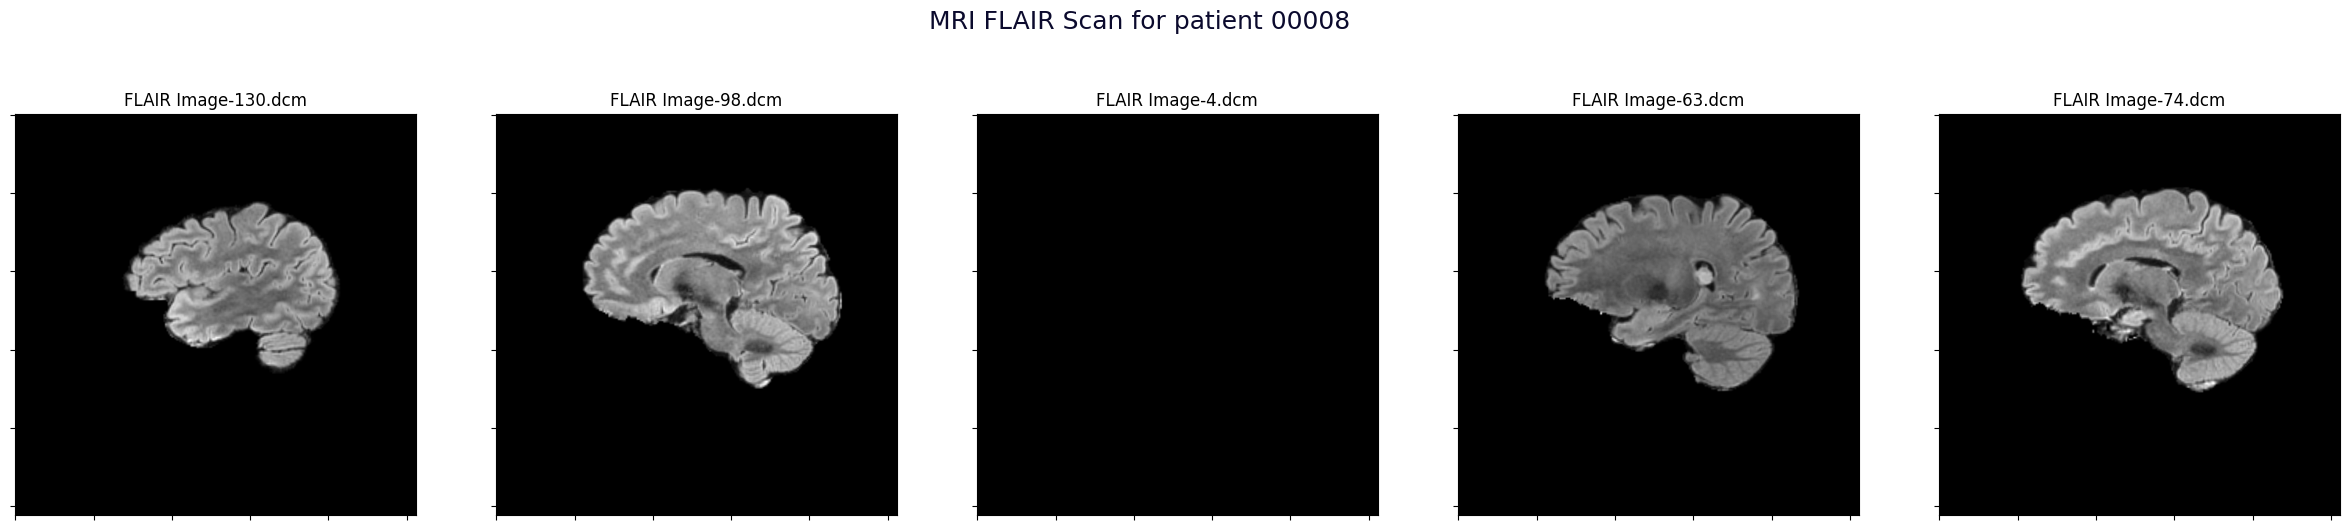

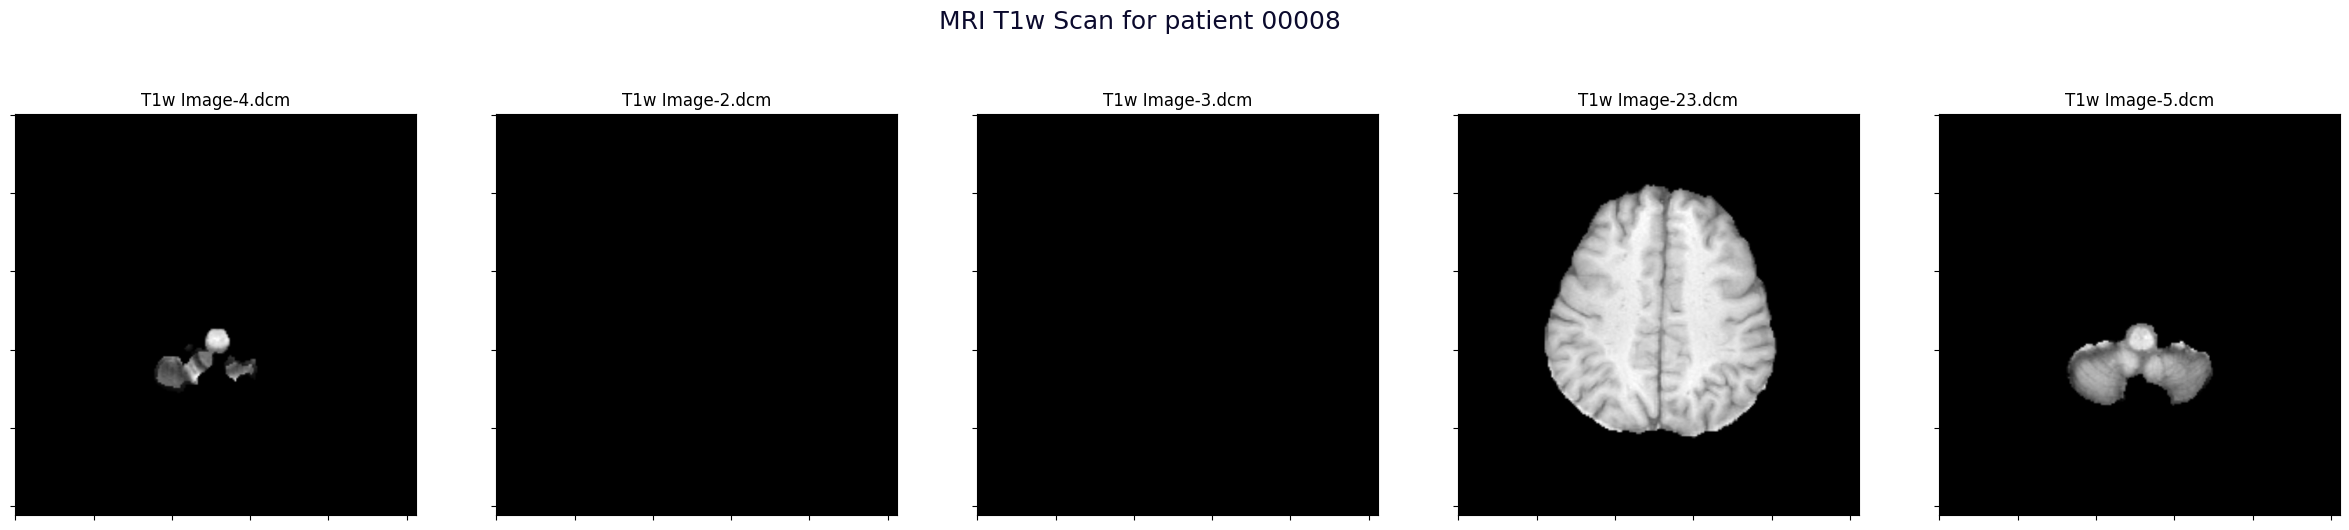

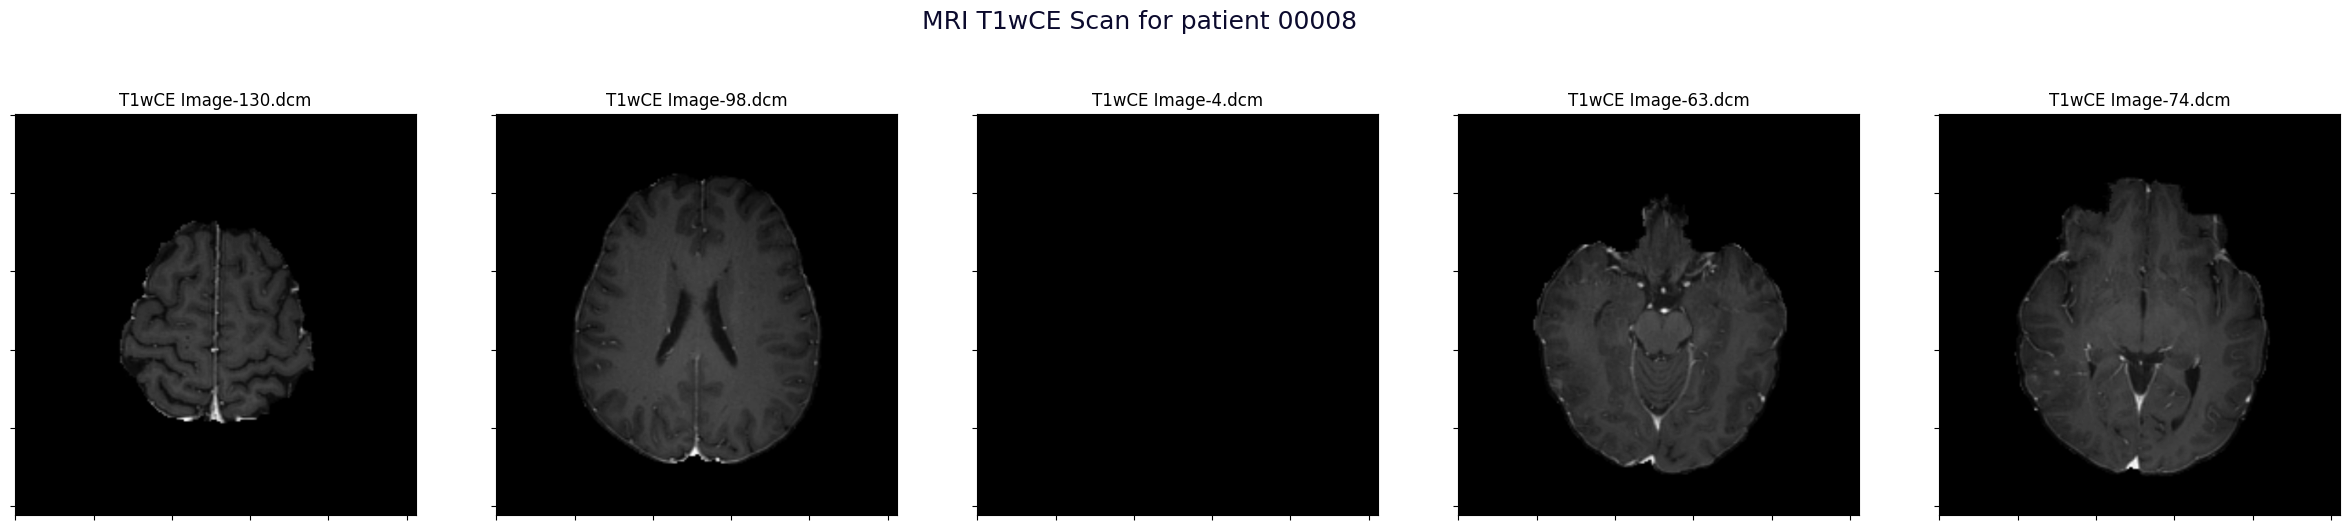

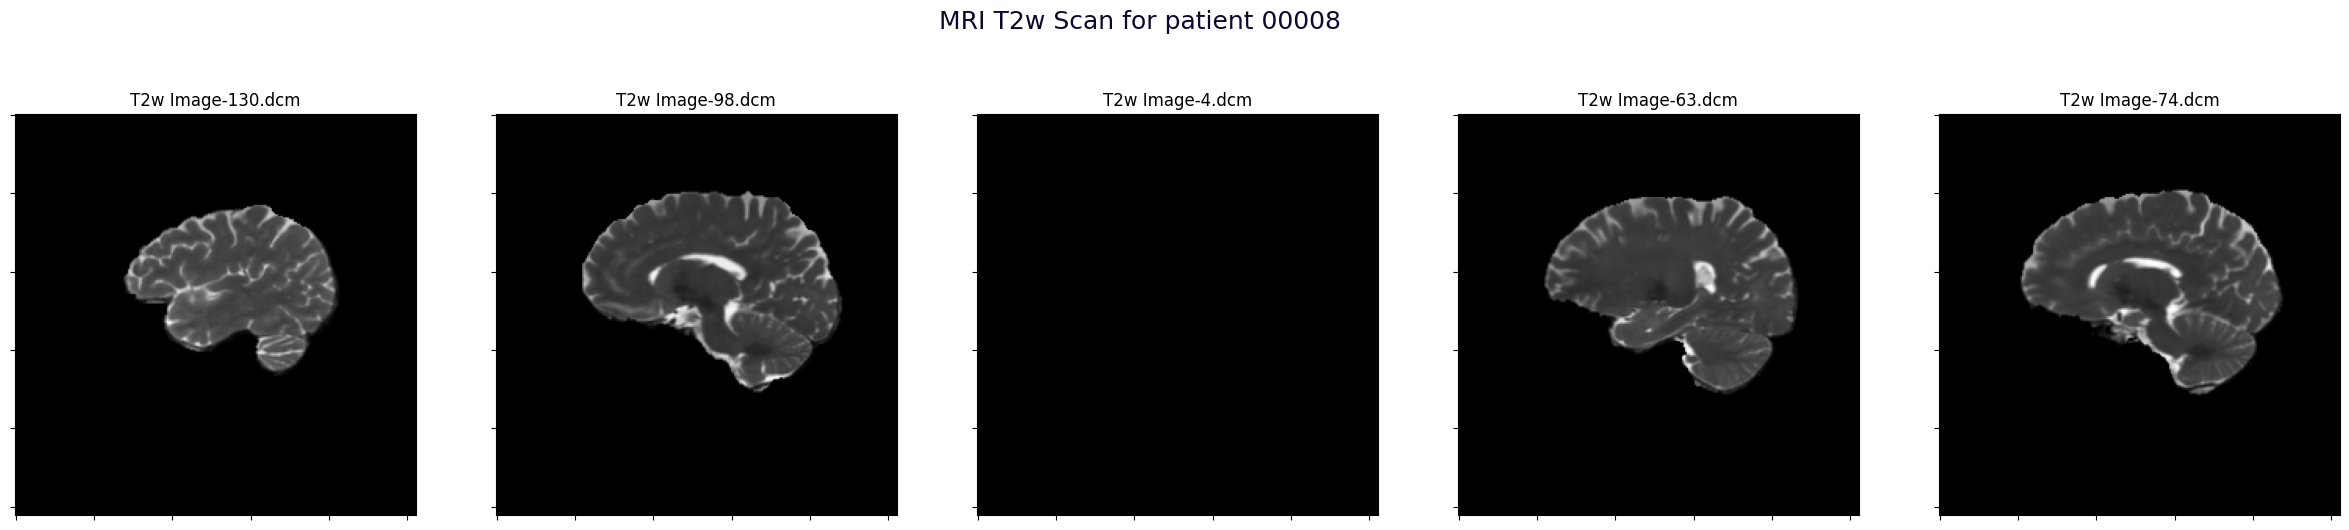

In [5]:
plot_examples(row = 5, cat = 'FLAIR')
plot_examples(row = 5, cat = 'T1w')
plot_examples(row = 5, cat = 'T1wCE')
plot_examples(row = 5, cat = 'T2w')